In [3]:
import pandas as pd
sample = pd.read_csv('PreprocessData/TotalOrders_sampling.csv')
sample.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0_x,order_id,product_id,user_id,eval_set,order_number,order_number.1,order_dow,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,Unnamed: 0_y,aisle_id,aisle,department_id,department,product_name
0,24346534,25120686,25120686,1348572,48299,159497,prior,15,15,4,7,5.0,7,1,48298,123,packaged vegetables fruits,4,produce,Baby Cut Carrots
1,29795709,30743513,30743513,2792883,3699,195288,prior,14,14,2,14,3.0,13,0,3698,83,fresh vegetables,4,produce,"Chard, Green, New England Grown"
2,28481056,29386745,29386745,1741981,28911,186631,prior,11,11,3,11,9.0,5,1,28910,130,hot cereal pancake mixes,14,breakfast,Buttermilk Complete Pancake & Waffle Mix
3,23671955,24424637,24424637,680761,10970,155029,prior,3,3,1,14,24.0,13,0,10969,105,doughs gelatins bake mixes,13,pantry,Chocolate Chip Cookie Mix
4,2988798,3083436,3083436,215407,47626,19822,prior,23,23,3,7,13.0,3,1,47625,24,fresh fruits,4,produce,Large Lemon


In [4]:
del sample['Unnamed: 0']
del sample['Unnamed: 0.1']
del sample['Unnamed: 0_x']
del sample['eval_set']
del sample['order_number.1']
del sample['order_dow']
del sample['order_hour_of_day']
del sample['days_since_prior_order']
del sample['add_to_cart_order']
del sample['Unnamed: 0_y']
 
sample.head()

,order_id,product_id,user_id,order_number,reordered,aisle_id,aisle,department_id,department,product_name
0,1348572,48299,159497,15,1,123,packaged vegetables fruits,4,produce,Baby Cut Carrots
1,2792883,3699,195288,14,0,83,fresh vegetables,4,produce,"Chard, Green, New England Grown"
2,1741981,28911,186631,11,1,130,hot cereal pancake mixes,14,breakfast,Buttermilk Complete Pancake & Waffle Mix
3,680761,10970,155029,3,0,105,doughs gelatins bake mixes,13,pantry,Chocolate Chip Cookie Mix
4,215407,47626,19822,23,1,24,fresh fruits,4,produce,Large Lemon


In [29]:
sample.sort_values(by='product_id', ascending=True).head(5)

,order_id,product_id,user_id,order_number,reordered,aisle_id,aisle,department_id,department,product_name
178542,2290286,1,181697,47,1,61,cookies cakes,19,snacks,Chocolate Sandwich Cookies
622606,3345716,1,141541,2,0,61,cookies cakes,19,snacks,Chocolate Sandwich Cookies
552674,3201896,1,144159,1,0,61,cookies cakes,19,snacks,Chocolate Sandwich Cookies
536631,1513899,1,93133,5,0,61,cookies cakes,19,snacks,Chocolate Sandwich Cookies
17004,2009107,1,63819,18,1,61,cookies cakes,19,snacks,Chocolate Sandwich Cookies


In [30]:
ProductId = sample['product_id']
type(ProductId)

pandas.core.series.Series

In [31]:
ProductId.value_counts().head(15)

24852    14522
13176    11624
21137     8243
21903     7576
47209     6655
47766     5368
47626     4749
26209     4440
16797     4409
27845     4335
27966     4280
22935     3385
24964     3328
45007     3287
39275     3168
Name: product_id, dtype: int64

In [33]:
ProductIdCount = ProductId.value_counts().head(15)

In [34]:
ProductIdCount

24852    14522
13176    11624
21137     8243
21903     7576
47209     6655
47766     5368
47626     4749
26209     4440
16797     4409
27845     4335
27966     4280
22935     3385
24964     3328
45007     3287
39275     3168
Name: product_id, dtype: int64

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

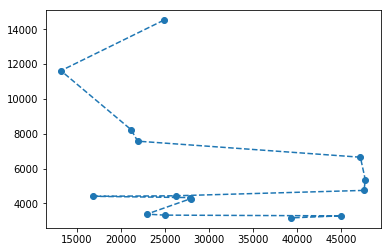

In [35]:
plt.figure
plt.plot(ProductIdCount, linestyle='dashed', marker='o')
plt.show()

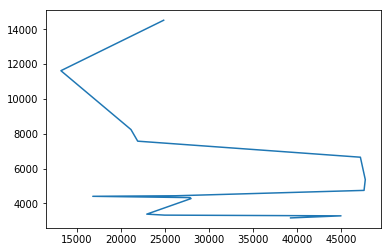

In [36]:
ProductIdCount.plot()

Text(0, 0.5, 'SalesRate')

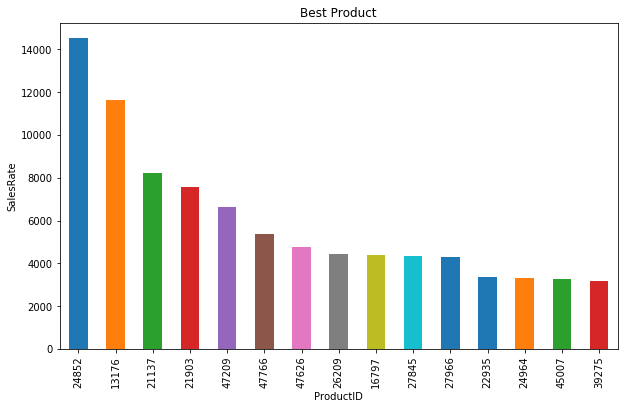

In [37]:
ProductIdCount.plot(kind='bar',figsize=(10,6), title='Best Product')
plt.xlabel('ProductID')
plt.ylabel('SalesRate')

In [38]:
ProductDep = sample['department']

In [47]:
ProductDepCount = ProductDep.value_counts()

In [48]:
ProductDepCount

produce            292239
dairy eggs         166843
snacks              89042
beverages           82849
frozen              69004
pantry              57983
bakery              36264
canned goods        33113
deli                32404
dry goods pasta     26725
household           22487
meat seafood        22079
breakfast           21738
personal care       13630
babies              13142
international        8321
alcohol              4842
pets                 2959
missing              2147
other                1109
bulk                 1080
Name: department, dtype: int64

Text(0, 0.5, 'Department')

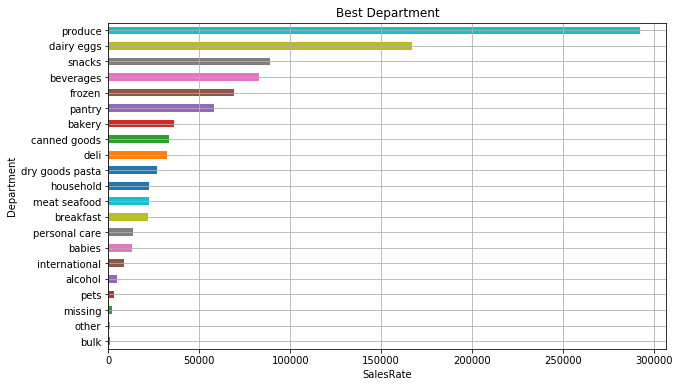

In [61]:
ProductDepCount.sort_values().plot(kind='barh',figsize=(10,6), title='Best Department', grid=True)
plt.xlabel('SalesRate')
plt.ylabel('Department')

In [79]:
sample.loc[:,['product_id','reordered']].head()

,product_id,reordered
0,48299,1
1,3699,0
2,28911,1
3,10970,0
4,47626,1


In [84]:
ReProduct = sample[sample['reordered'].isin(['1'])].loc[:,['product_id']]['product_id']
ReProduct.head()

0    48299
2    28911
4    47626
7    19057
8    24852
Name: product_id, dtype: int64

In [87]:
ReProductCount = ReProduct.value_counts().head(15)
ReProductCount

24852    12297
13176     9676
21137     6357
21903     5849
47209     5358
47766     4078
27845     3594
47626     3326
27966     3286
16797     3112
26209     3028
22935     2341
24964     2275
45007     2217
28204     2043
Name: product_id, dtype: int64

Text(0, 0.5, 'ReorderRate')

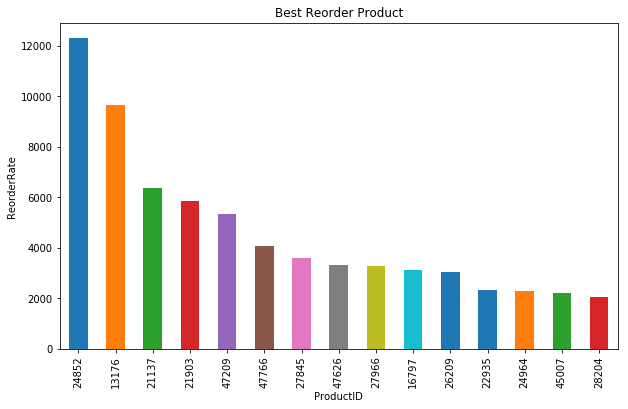

In [88]:
ReProductCount.plot(kind='bar',figsize=(10,6), title='Best Reorder Product')
plt.xlabel('ProductID')
plt.ylabel('ReorderRate')

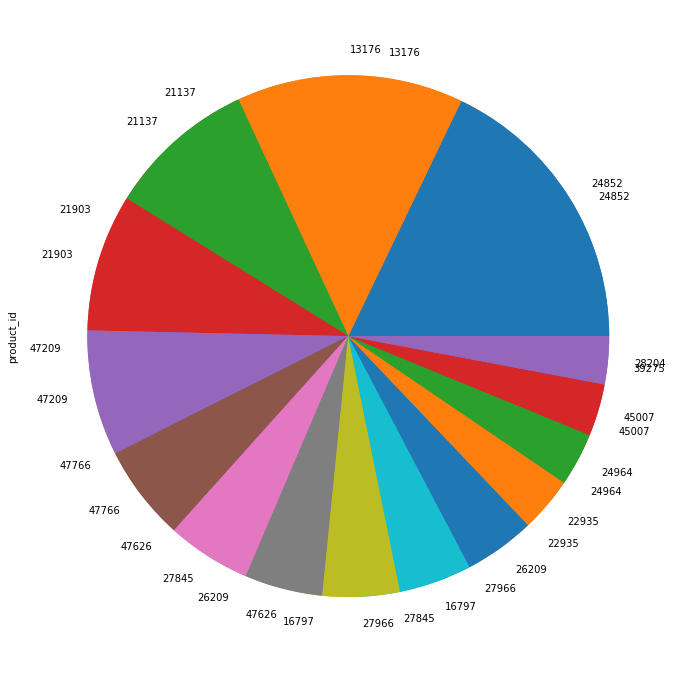

In [97]:
ProductIdCount.plot.pie(figsize=(12,12))
ReProductCount.plot.pie(figsize=(12,12))

In [ ]:
# 전체 코드
import pandas as pd
import matplotlib as plt

sample = pd.read_csv('PreprocessData/TotalOrders_sampling.csv')
sample.head()

# 데이터 프레임 처리 클래스    
class DataFrametoSeries:
    
    def BestProduct():
        
    def BestDepartment():
        
    def BestReorderProduct():

        

# 그래프를 그리는 함수
def GrafhPlotting(series):
    # Series binding
    grafh = series
    # plot optoin 
    grafh.plot()
    plt.show()
